In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
dfs = pd.read_excel('final_prepared.xlsx')

In [3]:
dfs.head()


,Unnamed: 0,AT,V,AP,RH,PE,Temp,Humid,AT_n,V_n,AP_n,RH_n
0,0,14.96,41.76,1024.07,73.17,463.26,1,4,0.372521,0.291815,0.771591,0.638204
1,1,25.18,62.96,1020.04,59.08,444.37,3,3,0.662040,0.669039,0.671863,0.449330
2,2,5.11,39.40,1012.16,92.14,488.56,1,4,0.093484,0.249822,0.476862,0.892493
3,3,20.86,57.32,1010.24,76.64,446.48,2,4,0.539660,0.568683,0.429349,0.684718
4,4,10.82,37.50,1009.23,96.62,473.90,1,4,0.255241,0.216014,0.404355,0.952547


In [4]:
X= dfs[["Temp","Humid","AT_n","V_n","AP_n","RH_n"]].values

In [5]:
y= dfs["PE"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

In [7]:
print("X train shape: ",X_train.shape)
print("X test  shape: ",X_test.shape)

print("y train shape: ",y_train.shape)
print("y test  shape: ",y_test.shape)

X train shape:  (35883, 6)
X test  shape:  (11961, 6)
y train shape:  (35883,)
y test  shape:  (11961,)


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=8, max_depth=5,
                                       n_estimators=100)

In [17]:
# fitting the training data
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=8, verbose=0,
                      warm_start=False)

In [18]:
y_prediction =  rf.predict(X_test)
y_prediction

array([486.11674585, 440.84845569, 471.88196637, ..., 471.42219643,
       433.69445011, 443.43166654])

In [19]:
y_test

array([482.21, 445.33, 474.08, ..., 467.21, 431.79, 442.89])

In [20]:
from sklearn.metrics import r2_score
print("R2 Score:")
r2_score(y_test, y_prediction)

R2 Score:


0.9395235633502752

In [21]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:")
mean_absolute_error(y_test, y_prediction)

Mean Absolute Error:


3.2388779030504384

In [22]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:")
mean_squared_error(y_test, y_prediction)

Mean Squared Error:


17.549904598577477

In [23]:
import math

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:")
print (math.sqrt(mean_squared_error(y_test, y_prediction)))

Root Mean Squared Error:
4.189260626718929


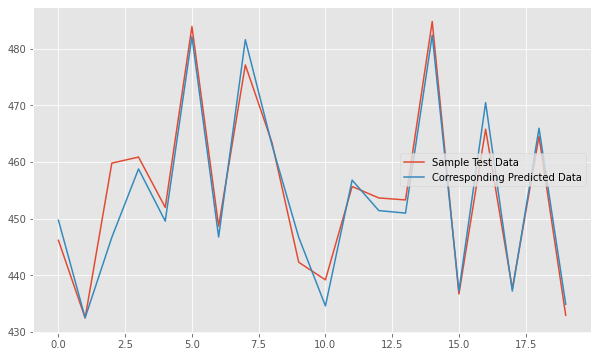

In [24]:
#the dalues from the data
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(10, 6))
plt.plot(y_test[500:520], label = "Sample Test Data")
plt.plot(y_prediction[500:520], label = "Corresponding Predicted Data")
plt.legend()

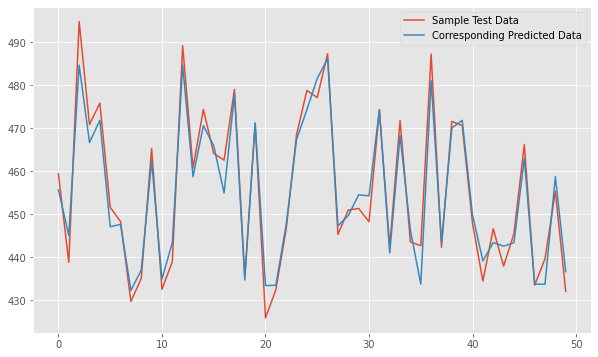

In [25]:
#the dalues from the data
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(10, 6))
plt.plot(y_test[1000:1050], label = "Sample Test Data")
plt.plot(y_prediction[1000:1050], label = "Corresponding Predicted Data")
plt.legend()